# Homework 3: Coding

**Due Tuesday October 4th, 11:59pm.**
**Note: Only Question 3 has code to submit for this assignment**
**Submit hw3.ipynb file to Gradescope (you may submit as many times as you'd like before the deadline).**

In [25]:
"""
Import libraries that you might require.

"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LogisticRegression

np.__version__


'1.21.6'

In [26]:
"""
FOR COLAB USERS ONLY

Run the following code to upload and unzip the data into the Colab environment.

"""
from google.colab import files
uploaded = files.upload()
! unzip hw3_q3.zip

Saving hw3_q3.zip to hw3_q3 (1).zip
Archive:  hw3_q3.zip
replace __MACOSX/._Train-subsets? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/._Train-subsets  
replace Train-subsets/X_train_50_.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Train-subsets/X_train_50_.txt  
replace __MACOSX/Train-subsets/._X_train_50_.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/Train-subsets/._X_train_50_.txt  
replace Train-subsets/y_train_90_.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Train-subsets/y_train_90_.txt  
replace __MACOSX/Train-subsets/._y_train_90_.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/Train-subsets/._y_train_90_.txt  
replace Train-subsets/X_train_70_.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Train-subsets/X_train_70_.txt  
replace __MACOSX/Train-subsets/._X_train_70_.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/Train-subsets/._X_train_70_.txt  
replace Train-subse

# Question 3: Logistic Regression and Gradient Descent

In [27]:
"""
Import required libraries.

"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LogisticRegression

In [5]:
"""
FOR COLAB USERS ONLY

Run the following code to upload and unzip the data into the Colab environment.

"""
from google.colab import files
uploaded = files.upload()
! unzip hw3_house_sales.zip

Saving hw3_house_sales.zip to hw3_house_sales.zip
Archive:  hw3_house_sales.zip
  inflating: X_test.csv              
  inflating: __MACOSX/._X_test.csv   
  inflating: X_train.csv             
  inflating: __MACOSX/._X_train.csv  
  inflating: y_test.csv              
  inflating: __MACOSX/._y_test.csv   
  inflating: y_train.csv             
  inflating: __MACOSX/._y_train.csv  


Implement the following functions for question 1. Please use the sklearn implementation of linear regression or other imports beyond those listed above.

In [28]:
"""
load data, a const dimension (for weight b) is already included in X.
"""
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(X_test.head(5))
print(y_test.head(5))

(800, 11)
(400, 11)
(800, 1)
(400, 1)
   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  GrLivArea  \
0    11851            7            5       1990          1990       1442   
1     9920            7            5       1996          1997       2013   
2    11216            8            5       2006          2006       1489   
3     8244            7            5       2004          2004       1720   
4    11787            7            5       1996          1997       2398   

   FullBath  BedroomAbvGr  KitchenAbvGr  YrSold  const  
0         2             3             1    2009      1  
1         2             3             1    2007      1  
2         2             3             1    2006      1  
3         2             3             1    2007      1  
4         2             3             1    2007      1  
   label
0      1
1      1
2      1
3      1
4      1


In [29]:
"""
Do some data preparation, convert dataframe to numpy array
"""
n_features = X_train.shape[1]

w = np.zeros((1, n_features))

# turn dataframe to np array
X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values

m_train =  X_train.shape[0]
m_test =  X_test.shape[0]

**Logistic regression with scikit** Fill in the logisticRegressionScikit() function. Report the weights, training accuracy, and the test accuracy. We will not use any penalty here, so set the parameters penalty = 'none', solver = 'saga'.Also, we will use 2000 iterations for a fair comparison to later algorithms, so also set the parameter max_iter=2000.

In [33]:
def LogisticRegressionScikit(X_train, y_train, X_test, y_test):

    """
    Computes logistic regression with scikit-learn.
    
    Args:
        X_train: feature matrix of training set, np array of (n, p)
                 where n is the number of training observations, 
                 p is the number of features
        y_train: truth value of training set, np array of (n, 1)

        X_test: feature matrix of test set, np array of (m, p)
                 where m is the number of test observations,
                 p is the number of features
        y_test: truth value of test set, np array of (m, 1)

    Returns:  
        w: numpy array of learned coefficients
        y_pred: numpy array of predicted labels for the test data
        score: accuracy of test data
    """
    LR_model = LogisticRegression(penalty = 'none', solver = 'saga', max_iter = 2000)
    LR_model.fit(X_train,y_train)
    y_hat = LR_model.predict(X_test)
    w = LR_model.coef_
    acc = accuracy_score(y_test,y_hat)

    return y_hat,w,acc


In [34]:
"""
Results for logistic regression Scikit function
"""
y_hat,w,acc = LogisticRegressionScikit(X_train, y_train, X_test, y_test)
print(w)
print(y_hat)
print(acc)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 8.77254236e-05  3.21055598e-05 -8.33753175e-06 -6.45666320e-04
  -1.03205928e-03  3.75015411e-03  9.91262835e-06 -7.38835785e-06
  -3.97879606e-06 -1.54731342e-03 -7.71044070e-07]]
[1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0
 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1
 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1
 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1
 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0
 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1
 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1]
0.81

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


**Logistic regression with simple gradient descent** Fill in the LogisticRegressionGD() function. To do that, two helper functions sigmoid_activation(), to calculate the sigmoid function result, and model_optimize(), to calculate the gradient of w, will be needed. Both helper functions can be used in the following AdaGrad optimization function. Use a learning rate of $10^{−4}$, run with 2000 iterations. Report the weights and accuracy. Keep track of the accuracy every 100 iterations in the training set. It will be used later.

In [35]:
def sigmoid_activation(result):
    """
    Calculates the sigmoid function.
    
    Args:
        x: numpy array of input, of shape (1, n)
           where n is the number of observations
        
    Returns:
        final_result: numpy array of sigmoid result, of shape (1, n)
                      where n is the number of observations
    """
    res = 1/(1+np.exp(-1*result))
    return res

We add a predict() function here to threshold probability prediction into binary classification

In [36]:
def predict(final_pred, n):
    """
    Predict labels from probability to 0/1 label, threshold 0.5.
    
    Args:
        final_pred: numpy array of probabilty that each sample belonging to class 1, of shape (1, n)
                    where n is the number of observations 
        
    Returns:
        y_pred: numpy array of label of each sample, of shape (1, n)
                where n is the number of observations
    """

    pred_final = np.where(final_pred>0.5,1,0)

    return pred_final

**Remember to derive the gradient, write down the weight update formula, and hand in them to the latex submission!**

In [37]:
def model_optimize(w, X, Y):
    
    """
    Calculates gradient of the weights.
    
    Args:
        X: numpy array of training samples of shape (n, p)
           where n is the number of observations
           p is the number of features
        Y: numpy array of training labels of shape (n, 1)
        w: numpy array of weights of shape (1, p)
    Returns:
        dw: the gradient of the weights of shape (1, p)
    """
    v=np.dot(w, X.T)
    v1=sigmoid_activation(v).T - Y#transpose the entire thing
    derivative_w = -1*(np.dot(X.T, v1)).T 
    derivative_w = derivative_w/X.shape[0]
    return derivative_w

In [38]:
def LogisticRegressionGD(w, X, Y, learning_rate, num_iterations):
    """
    Uses batch gradient descent to update weights for logistic regression.

    Args:       
        w: numpy array of initial weights of shape (1, p)
           where p is the number of features
        X: numpy array of training samples of shape (n, p)
           where n is the number of observations
        Y: numpy array of training labels of shape (n, 1)
        learning_rate: float number learning rate to update w
        num_iterations: int number of iterations to update w
    
    Returns:  
        coeff: numpy array of weights after optimization of shape (1, p)
        accuracies: a list of accuracy at each hundred's iteration. With 2000 iterations, 
                    accuracies should be a list of size 21 (starting from 0)

    """

    n=np.shape(X)[0]
    accuracies = []
    j = 0;
    for j in range(num_iterations+1):
      der_w = model_optimize(w, X, Y)#transpose this
      # print(dw)
      w = w + learning_rate * der_w
      print(w.shape)
      if(j%100 == 0):
        v=sigmoid_activation(np.dot(w , X.transpose()))
        y_hat = predict(v,n)
        #print(np.shape(y_hat))
        score=accuracy_score(Y,y_hat.transpose())
        accuracies.append(score)
      
        #print(count)
      
    return w,accuracies

**Logistic regression with AdaGrad** Fill in the LogisticRegressionAda() function. Use a learning rate of $10^{−4}$, run with 2000 iterations. Report the weights and accuracy. Keep track of the accuracy every 100 iterations in the training set. It will be used later.

In [39]:
def LogisticRegressionAda(w, X, Y, learning_rate, num_iterations):

    """
    Use AdaGrad to update weights.
    
    Args:       
        w: numpy array of initial weights of shape (1, p)
           where p is the number of features
        X: numpy array of training samples of shape (n, p)
           where n is the number of observations
        Y: numpy array of training labels of shape (n, 1)
        learning_rate: float number learning rate to update w
        num_iterations: int number of iterations to update w
    
    Returns:  
        coeff: numpy array of weights after optimization of shape (1, p)
        accuracies: a list of accuracy at each hundred's iteration. With 2000 iterations, 
                    accuracies should be a list of size 21 (starting from 0)
    """
    n1 =np.shape(Y)[0]
    p = np.shape(X)[1]
    accuracies = []
    error_ = 0
    i=0
    noise=0.00001
    for i in range(num_iterations+1):
      dw = model_optimize(w,X,Y) #1*p
      error_ =error_+ sum(np.square(dw))
      w= w+ (learning_rate*dw)/(np.sqrt(error_) + noise)
      if(i%100 == 0):
        y_predict = predict(sigmoid_activation(np.dot(w,X.T)), n1).T
        score=accuracy_score(Y, y_predict)
        accuracies.append(score)
      
    return w, accuracies

Now we start to use our dataset and construct model.

Model construction for GD logistic regression.

In [40]:
"""
Results for gradient descent weight update
"""

# Gradient Descent
len=X_train.shape[1]
w = np.zeros((1,len))
coeff_GD, acc_GD = LogisticRegressionGD(w, X_train, y_train, learning_rate=0.0001,num_iterations=2000) #1*p,

# predict probability
print(coeff_GD)
print(acc_GD)
v=np.dot(coeff_GD,X_test.T)
p = sigmoid_activation(v)
v1=np.dot(coeff_GD,X_train.T)
p1 = sigmoid_activation(v1)
# predict label
n = np.shape(X_train)[0]
n1=np.shape(X_test)[0]
label = predict(p,n)
#print(p)
#print(label)
n_1 = np.shape(X_test)[0]
y_hat = predict(sigmoid_activation(v),n1)
a_test = accuracy_score(y_hat.transpose(),y_test)
y_hat1=predict(sigmoid_activation(v1),n)
a_train = accuracy_score(y_hat1.transpose(),y_train)

print(y_train.shape)

print(a_test)
print(a_train)

(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)
(1, 11)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


Model construction for AdaGrad logistic regression.

In [41]:
"""
Results for AdaGrad Descent weight update
Please comment out these statements before converting to .py file and submitting.
"""
len1=X_train.shape[1]
w = np.zeros((1,len1))
coeff_Ada, acc_Ada = LogisticRegressionAda(w, X_train, y_train, learning_rate=0.0001, num_iterations=2000)

# predict probability
print(coeff_Ada)
print(acc_Ada)

p = sigmoid_activation(np.dot(coeff_Ada , X_test.transpose()))
#print(p)
# predict label
n = np.shape(X_test)[0]
n1=np.shape(X_train)[0]
label = predict(p,n)
#print(label)
v=np.dot(coeff_Ada,X_test.T)
y_hat = predict(sigmoid_activation(v),n)
a_test = accuracy_score(y_hat.transpose(),y_test)
v1=np.dot(coeff_Ada,X_train.T)
y_hat1=predict(sigmoid_activation(v1),n1)
a_train=accuracy_score(y_hat1.transpose(),y_train)
print(a_test)
print(a_train)

[[ 8.56620279e-05  7.32807065e-03 -4.06619458e-03 -1.83916483e-04
  -1.05941162e-03  4.09610535e-03  7.04497140e-03 -7.03024914e-03
  -6.97052180e-03 -2.22112696e-03 -2.22202397e-03]]
[0.4975, 0.7925, 0.8025, 0.805, 0.81, 0.81125, 0.81625, 0.81375, 0.815, 0.81625, 0.81625, 0.81875, 0.82125, 0.8225, 0.8225, 0.82375, 0.82375, 0.82375, 0.82375, 0.82375, 0.82375]
0.815
0.82375


Plot accuracy vs iteration for GD and AdaGrad. Compare the performance difference. Briefly explain the reason.

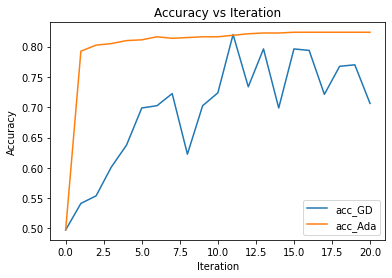

In [42]:
"""
Plot accuracy vs iteration for GD and AdaGrad
"""

plt.plot(acc_GD,label = 'acc_GD')
plt.plot(acc_Ada,label = 'acc_Ada')
plt.title("Accuracy vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()